<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span></a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 


**Цель:** установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


# Вывод

<div class="alert alert-block alert-info">
     Всего в данном проекте представлены данные об 23699 объявлениях с 22 признаками, среди которых есть количественные и категориальные признаки. Признаки представлены данными нескольких типов: int, object, float.
</div>    

## Предобработка данных

<div class="alert alert-block alert-info">

  <b>Описание проекта</b>

  <b>Цель данного проекта:</b> научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
    
  <b>Входные данные:</b> архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
</div>

<div class="alert alert-block alert-info">
<b> 1. Обработка пропущенных значений</b>
</div>

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-info">

  <b>Описание пропущенных значений</b>
  Были пропущены значения в столбце с данными о высоте потолков, всего этажей в доме, жилой площади в квадратных метрах, апартаментах, площади кухни, наличия балконов, названиях населенных пунктов, расстоянии до ближайшего аэропорта, расстоянии до центра города, числе парков в радиусе 3-х км, расстоянии до ближайшего парка, днях размещения объявления.

  <b>Высота потолков</b>

  Возможно пропуски в данном столбце были сделаны преднамеренно пользователем, а может быть не были получены на основе картографических данных. Поэтому здесь не стоит их заполнять.
    
  <b>Всего этажей в доме</b>
    
  Ситуация аналогична высоте потолков, возможно пропуски были представлены преднамеренно. Их не стоит заполнять.
    
  <b>Жилая площадь в квадратных метрах</b>
    
  То же самое, ничего не меняем.
    
  <b>Апартаменты</b>
    
  Апартаменты - фактически это гостиничный номер, который можно купить с целью проживания, либо для сдачи в аренду. Думаю, большое количество пропусков в данном столбце, поскольку пользователь не всегда понимает отличие обычного жилья и апартаментов и пропускает данный пункт. И именно для такого пользователя жильё не является апартаментами, поэтому я считаю, что нужно заполнить значением False пустые значения для данного столбца.
    
  <b>Площадь кухни</b>
  
 Оставляем без изменений
    
  <b>Балконы</b>
  Незаполненные значения в данном столбце могут означать, что балконов нет. Заполняем пустые значения нулями.
    
  <b>Название населенного пункта</b>  
    
  Возможно были пропущены по ошибке, возможен также вариант продажи недвижимости в местах без названия населенного пункта. Заполнять данные пропуски не стоит.
    
  <b>Расстояние до ближайшего аэропорта</b>
    
  Возможно расстояние до ближайшего аэропорта обчень большое для этих объектов недвижимости, поэтому его не указали. Правильно будет оставить как есть.
    
  <b>Расстояние до центра города</b>
    
  Здесь возможно расстояние до центра города не указано, так как объекты недвижимости находятся в центре. Можно заполнить пропуски нулями.
    
  <b>Число парков в радиусе 3-х км</b>
    
  Возможно пропуски указывают на то, что парков в радиусы 3-х километров для данных объектов-нет. Заплняем нулями.
    
  <b>Расстояние до ближайшего парка</b>
    
  Возможно не указано по причине того, что расстояние слишком большое до ближайшего парка. Либо парка нет в данном населенном пункте. Оставляем, как есть.
    
  <b>Число водоемов в радиусе 3-х км</b>
    
  Аналогично полю Число парков в радиусе 3-х км.
    
  <b>Расстояние до ближайшего водоема.</b>
  
  Ситуация аналогична полю Расстояние до ближайшего парка
    
  <b>Cколько дней было размещено объявление (от публикации до снятия)</b>  
    
  Не указано для тех объявлений, которые еще не сняты. Оставляем как есть.
    
    
    
    
    
    
    
  Таким образом, необходимо обработать пропуски в полях: is_apartment, balcony, cityCenters_nearest, parks_around3000, ponds_around3000.
    
  

    
</div>

In [5]:
#Обрабатываем столбец is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

In [6]:
#Выделим в список поля для заполнения нулями
filled_columns = ['balcony', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']

#В цикле заполним пустые значения в этих полях нулями
for name_column in filled_columns:
    data[name_column] = data[name_column].fillna(0)

In [7]:
#Проверим заполнение
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-info">

  <b>Возможные причины появления пропусков</b>
    
Возможные причины появления пропусков в данных:
    
  -ошибки, связанные с человеческим фактором
    
  -технологические ошибки

  -намеренные ошибки
    
  В нашем случае пропуски, которые явно указывают, на то, что они являются намеренными, были заполнены.
 

<div class="alert alert-block alert-info">
<b> 1. Приведение данных к нужному типу</b>
</div>

In [8]:
#Еще раз посмотрим на типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
#Приведем столбец к типу данных дата
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
#Также приведем к типу int столбцы balcony, parks_around3000, ponds_around3000,
#Так как данные переменные характеризуют количество, лучше отражать их в целых числах
converted_columns = ['balcony', 'parks_around3000', 'ponds_around3000', 'last_price']

for column in converted_columns:
    data[column] = data[column].astype('int')

In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<div class="alert alert-block alert-info">
Привели столбец с датами к типу данных Дата, а также привели несколько полей к целочисленному типу данных, поскольку они отражают количество и лучше их не отражать в типе данных чесел с плавающей точкой. Поле с ценой отобразили в целочисленном типе, чтобы было нагляднее в дальнейшем анализировать.
</div>

## Расчёты и добавление результатов в таблицу

In [12]:
#Добавялем цену за квадратный метр
data['meter_price'] = data['last_price'] / data['total_area']

In [13]:
#Добавляем день недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [14]:
data['month_correct'] = data['first_day_exposition'].astype('datetime64[M]')

In [15]:
#Добавляем этаж квартиры
#Для этого произведем категоризацию данных: создадим функцию и методом apply создадим новый столбец
def floor(data):
    if data['floor'] == 1:
        return 'первый'
    
    if data['floor'] == data['floors_total']:
        return 'последний'

    return 'другой'

In [16]:
data['name_floor'] = data.apply(floor, axis=1)

In [17]:
#Добавляем соотношение жилой площади и общей площади
data['ratio_living_area'] = data['living_area'] / data['total_area']

In [18]:
#Добавляем отношени площади кухни к общей площади
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [19]:
#Проверим таблицу
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,meter_price,weekday,month,year,month_correct,name_floor,ratio_living_area,ratio_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,NaN,120370.370370,3,3,2019,2019-03-01,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,81.0,82920.792079,1,12,2018,2018-12-01,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,574.0,558.0,92785.714286,3,8,2015,2015-08-01,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,234.0,424.0,408176.100629,4,7,2015,2015-07-01,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000.000000,1,6,2018,2018-06-01,другой,0.320000,0.410000


<div class="alert alert-block alert-info">
Добавили необходимые столбцы. При помощи атрибута dt получили день недели, месяц, год подачи объявления. Произвели категоризацию в зависимости от этажа, а также посчитали отношения площадей
</div>

## Исследовательский анализ данных

### 

In [20]:
#Добавим столбец last_price_thousands в единицах измерения тыс. руб., чтобы было легче анализировать данные
data['last_price_thousands'] = data['last_price'] / 1000

#Создадим список полей для анализа
columns_for_analysis = ['total_area', 'last_price_thousands', 'rooms', 'ceiling_height']

In [21]:
#Изучим данные при помощи метода describe
for column in columns_for_analysis:
    print(column)
    print(data[column].describe())

total_area
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
last_price_thousands
count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price_thousands, dtype: float64
rooms
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
ceiling_height
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<div class="alert alert-block alert-info">
<b>Площадь</b>
В столбце площади видим, что стандартное отклонение отличается значительно от среднего, это говорит о том, что могут быть аномалии. Но, если посмотреть на минимальное и максимальное значения, то можно предположить, что эти данные реальны.
    
<b>Цена</b>
Стандартное отклонение сильно отличается от среднего. Оно даже больше его. Значит, в данных однозначно присутствуют аномалии. Минимальное значение очень маленькое, с такими маленькими значениями нужно разбираться.
    
<b>Число комнат</b>
Если посмотреть на минимальное значение, равное 0, это говорит о том, что это ошибка. Для объекта недвижимости минимальное число комнат равно 1.    
    
<b>Площадь</b>
Максимальное значение явно ошибочное, из-за этого получется и большая разница между стандартным отклонением и средним.

</div>

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'last_price_thousands'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

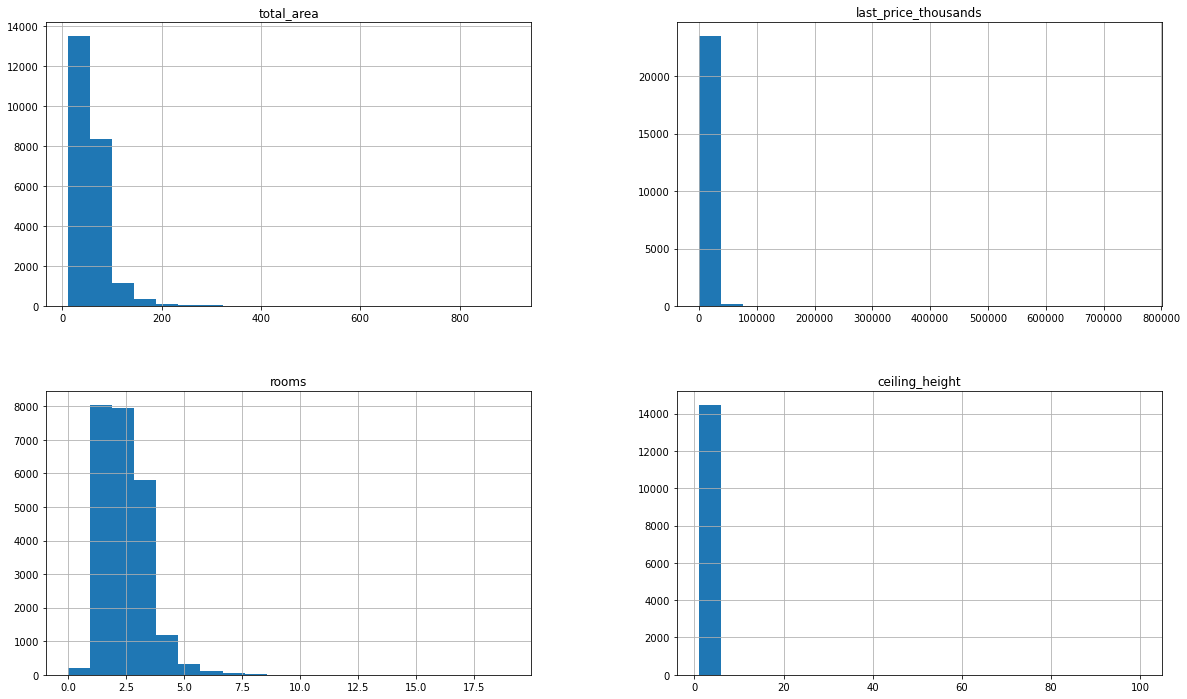

In [22]:
#Построим гистограмму для анализируемых столбцов
data[columns_for_analysis].hist(figsize=(20,12), bins=20)

total_area
AxesSubplot(0.125,0.125;0.775x0.755)
last_price_thousands
AxesSubplot(0.125,0.125;0.775x0.755)
rooms
AxesSubplot(0.125,0.125;0.775x0.755)
ceiling_height
AxesSubplot(0.125,0.125;0.775x0.755)


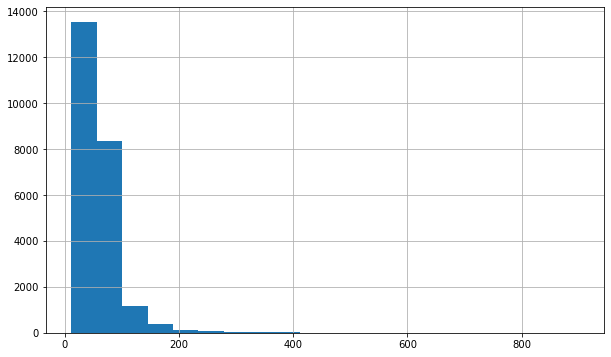

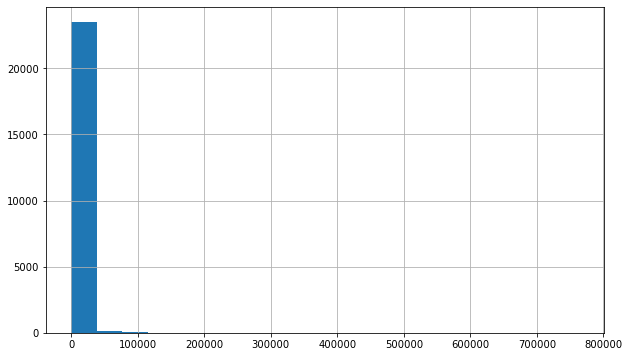

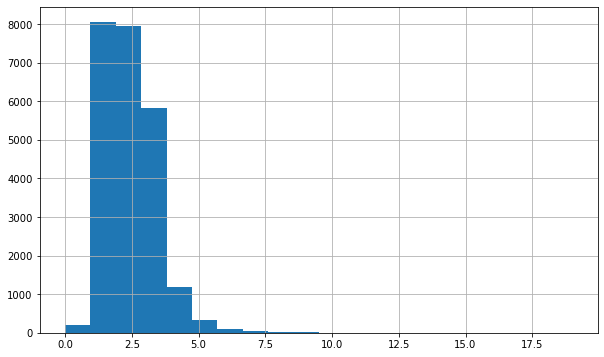

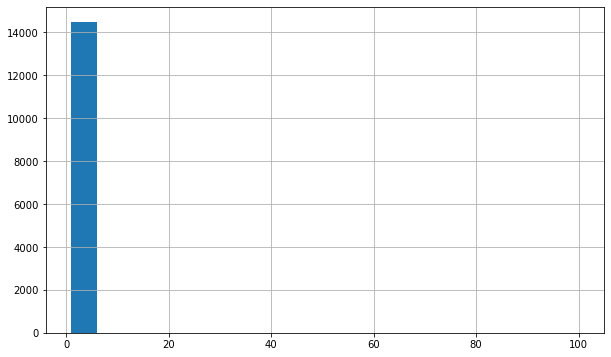

<Figure size 432x288 with 0 Axes>

In [23]:
for column in columns_for_analysis:
    print(column)
    print(data[column].hist(bins=20, range=(data[column].min(), data[column].max()), figsize=(10,6)))
    plt.figure()

<div class="alert alert-block alert-info">
Попробовала отрисовать в цикле, но не очень наглядно. Выведем каждый график по отдельности
</div>

<AxesSubplot:>

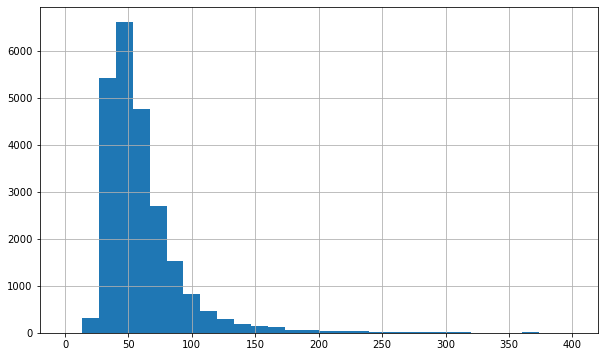

In [24]:
#Посмотрим на каждый график более детально
data['total_area'].hist(bins=30, range=(0,400), figsize=(10,6))

<div class="alert alert-block alert-info">
По гистограмме видно, что наиболее частые объекты в наборе данных с площадью около 50 кв. метров.
</div>

<AxesSubplot:>

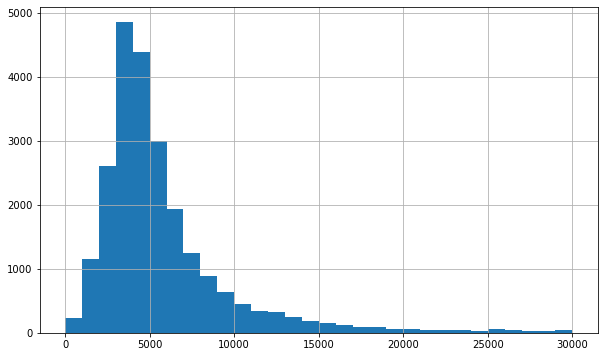

In [25]:
data['last_price_thousands'].hist(bins=30, range=(0,30000), figsize=(10,6))

<div class="alert alert-block alert-info">
По гистограмме видно, что наиболее частые объекты в наборе данных со стоимостью около 3000 тыс. рублей.
</div>

<AxesSubplot:>

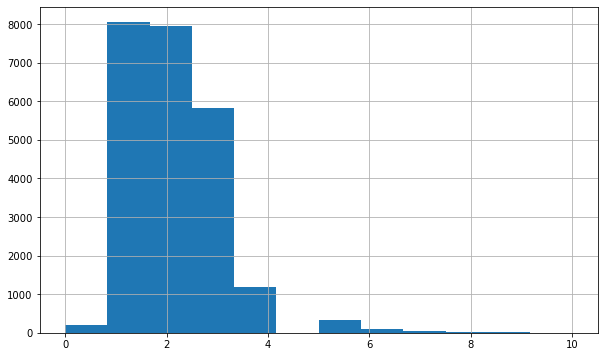

In [26]:
data['rooms'].hist(bins=12, range=(0,10), figsize=(10,6))

<div class="alert alert-block alert-info">
По гистограмме видно, что наиболее частые объекты в наборе данных с 1  и 2 комнатами.
</div>

<AxesSubplot:>

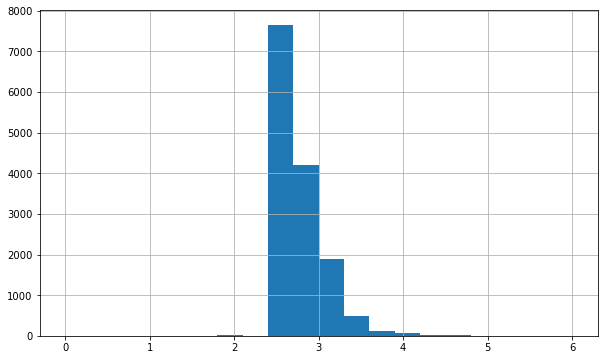

In [27]:
data['ceiling_height'].hist(bins=20, range=(0,6), figsize=(10,6))

<div class="alert alert-block alert-info">
По гистограмме видно, что наиболее частые объекты в наборе данных с высотой потолка 2,7 метра.
</div>

### 

In [28]:
#Посмотрим на характеристики
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

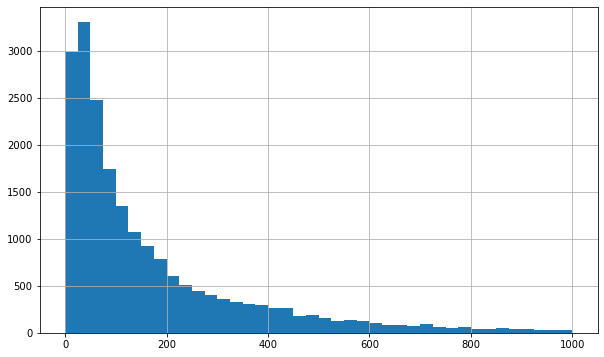

In [29]:
#Построим гистограмму
data['days_exposition'].hist(range=(0,1000), figsize=(10,6), bins=40)

(-10.0, 600.0)

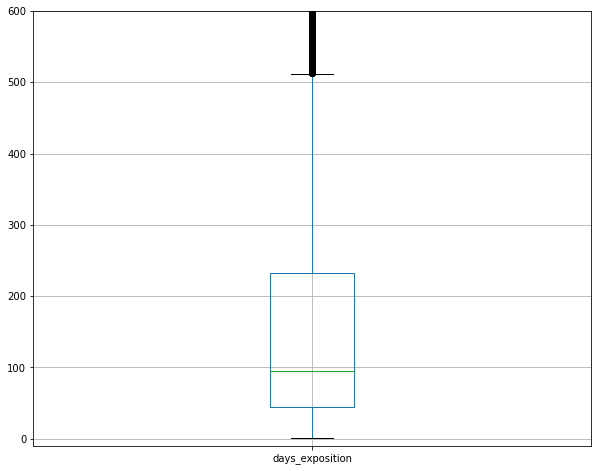

In [30]:
#Построим диаграмму размаха
data.boxplot(column='days_exposition', figsize=(10,8))
plt.ylim(-10,600)


In [31]:
#Наиболее частов стречающееся значение
data['days_exposition'].mode()

0    45.0
dtype: float64

<div class="alert alert-block alert-info">
Среднее значение сильно отличается от медианы, как и стандартное отклонение от среднего. Это говорит о том, что в данных есть сильно выделяющиеся значения.

Судя по гистограме и рассчитанной моде, продажи занимают  около 45 дней обычно.

Исходя из диаграммы размаха, можно считать, что продажи прошли быстро, если они прошли меньше, чем за 1 день. Медленно - если больше, чем за 510-520 дней.
</div>

### 

In [32]:
#Убираем редкие и выделяющиеся значения по проанализированным выше полям
data = data.query('days_exposition < 520 & total_area < 150 & last_price_thousands < 15000  & rooms < 6 & rooms> 0 & ceiling_height < 4')

<div class="alert alert-block alert-info">
Убираем значения, которые находятся за пределами усов по полю время продажи. По остальным полям убираем редкие значения в соответствие с построенными гистограммами. К примеру, для общей площади квартир редкими являются значения, которые выше, чем 150 кв. м. и т.д.
</div>

<div class="alert alert-block alert-info">
Для того, чтобы оценить зависимость цены от различных факторов. Произведем по некоторым полям категоризацию.
Построим несколько сводных таблиц, а также посчитаем корреляцию.
</div>

In [33]:
#Создаем функция для категоризации площади
def area(row):
    if row <=  50:
        return 'Маленькая площадь'
    
    if 50 < row <= 100:
        return 'Средняя площадь'
    
    return 'Большая площадь'

In [34]:
#Создаем новый столбец
data['area_category'] = data['total_area'].apply(area)

In [35]:
#Разделим столбец удаленность от центра на 3 интервала и запишем в переменую.
#Для начала посмторим на данные
data['cityCenters_nearest'].describe()

count    10350.000000
mean     11751.572464
std       9664.170874
min          0.000000
25%       4321.250000
50%      12021.000000
75%      15486.000000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

In [36]:
cityCenters_nearest = pd.cut(data['cityCenters_nearest'], [0, 20000, 40000, 65000])

In [37]:
#Зависимость стоимости за метр от площади, количества комнат и удаленности от центра в метрах
data.pivot_table('last_price', index=['area_category', 'rooms', cityCenters_nearest]).sort_values(by='last_price', ascending=False).head(10)

last_price
area_category   rooms cityCenters_nearest              
Большая площадь 3     (0, 20000]           1.198005e+07
                1     (0, 20000]           1.192645e+07
                5     (0, 20000]           1.094576e+07
                4     (0, 20000]           1.086548e+07
                3     (20000, 40000]       9.786154e+06
                2     (20000, 40000]       9.050000e+06
                4     (20000, 40000]       8.620833e+06
Средняя площадь 1     (40000, 65000]       8.532500e+06
Большая площадь 4     (40000, 65000]       8.495000e+06
                2     (0, 20000]           8.018438e+06

In [38]:
#Посмотрим, как цена зависит от категрии этажа.
data.pivot_table('last_price', index='name_floor').sort_values(by='last_price', ascending=False)

,last_price
name_floor,
другой,5.328298e+06
последний,4.911196e+06
первый,4.215490e+06


<div class="alert alert-block alert-info">
Самая высокая стоимость объектов, расположенных не на первом и не на последнем этажах.
</div>

In [39]:
#Посмотрим на зависимость от дня недели, месяца и года в сводной таблице
data.pivot_table('last_price', index=['weekday', 'month', 'year']).sort_values(by='last_price', ascending=False).head(10)

last_price
weekday month year              
1       9     2015  1.249000e+07
2       5     2015  1.060000e+07
6       10    2016  9.975000e+06
0       4     2015  9.325000e+06
1       9     2016  8.450000e+06
3       11    2015  8.163333e+06
6       1     2016  8.145000e+06
2       1     2016  7.950000e+06
        8     2016  7.872500e+06
4       8     2015  7.663667e+06

<div class="alert alert-block alert-info">
Самая высокая стоимость объектов, объявления которых поданы в понедельник и вторник в сентябре 2015 года.
</div>

In [40]:
#Посчитаем корреляцию между ценой за метр квадратнй и такими признаками, как: площадь, число комнат, удаленность от центра, этаж, дата размещения
analyzed_columns = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'floor', 'weekday', 'month', 'year']

In [41]:
correlation = pd.DataFrame(data[analyzed_columns].corr().loc['last_price'])
correlation['mod'] = abs(correlation['last_price'])
correlation.sort_values(by='mod', ascending=False)

,last_price,mod
last_price,1.000000,1.000000
total_area,0.749388,0.749388
rooms,0.476760,0.476760
floor,0.137666,0.137666
cityCenters_nearest,0.019813,0.019813
year,-0.017471,0.017471
weekday,-0.013446,0.013446
month,0.008934,0.008934


<div class="alert alert-block alert-info">
По таблице видно, что присутствует зависимость цены от площади
</div>

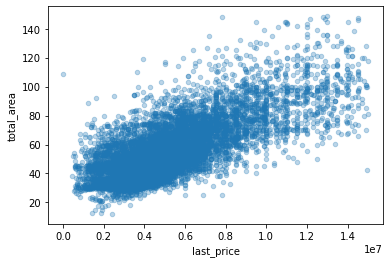

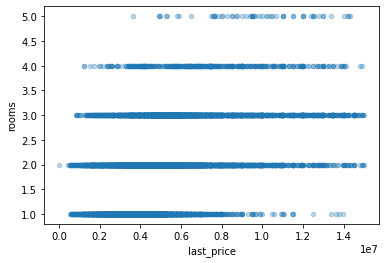

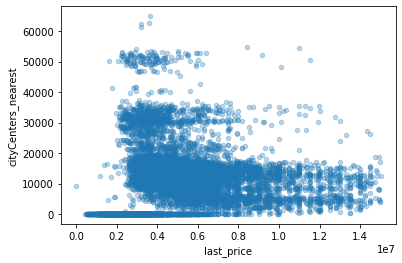

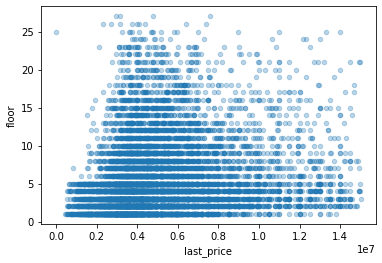

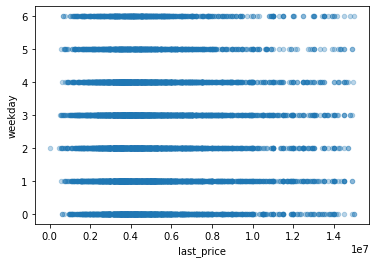

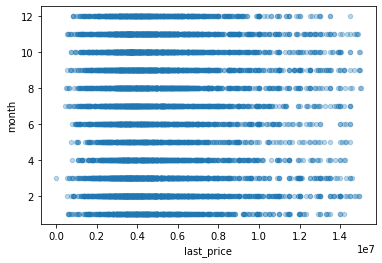

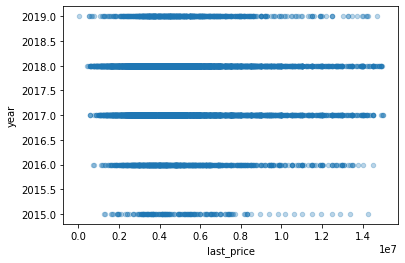

In [42]:
#Отобразим корреляцию на графиках
for feature in analyzed_columns[1:]:
    data.plot(x='last_price', y=feature, kind='scatter', alpha=0.3)

<div class="alert alert-block alert-info">
По первому графику видно, чем больше площадь, тем выше цена.
    
По остальным графикам сложно сделать какие-либо выводы.    
</div>

<div class="alert alert-block alert-info">
Таким образом, самая большая стоимость за метр квадратный у объектов со средней площадью (50-100 кв. м), одной комнатой и удаленными от центра на 40-65 км.

Самая высокая стоимость объектов, расположенных не на первом и не на последнем этажах.

Самая высокая стоимость объектов, объявления которых поданы в понедельник и вторник в апреле 2015 года.
    
Исходя из рассчитанной корреляции, зависимость стоимости за метр от перечисленных признаков не очень сильная. Самая высокая из них-это этаж. Чем выше этаж, тем выше стоимость за квадртаный метр.   
    
</div>

In [43]:
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.749388,0.476760,0.019813
total_area,0.749388,1.000000,0.795971,-0.054319
rooms,0.476760,0.795971,1.000000,-0.035994
cityCenters_nearest,0.019813,-0.054319,-0.035994,1.000000


<div class="alert alert-block alert-info">
По таблице видно, что самая большая зависимость цены от количества комнат. Коэффициент корреляции Пирсона 0,796. То есть, чем больше комнат, тем выше цена.
А также хорошо наблюдается положительная линейная зависимость у факторов цена и площадь (коэффициент равен 0,75).
</div>

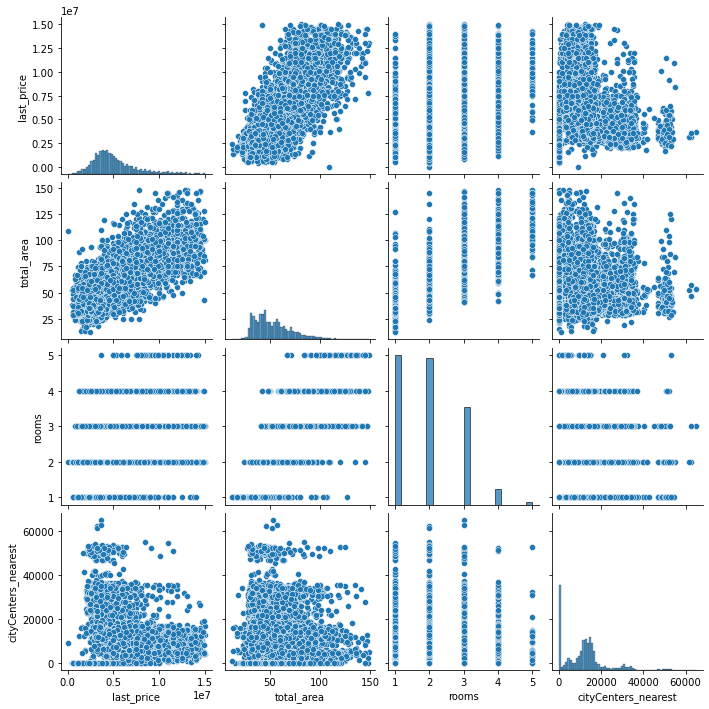

In [44]:
sns.pairplot(
    data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
)

<div class="alert alert-block alert-info">
Это визуализация позволяет посмотреть на одной картинке, как связаны между собой признаки.
По диагонали видим гистограммы распределений признака.
Хорошо отображена на графике положительная линейная зависимость у факторов цена и площадь.
</div>

Text(0, 0.5, 'Средняя цена')

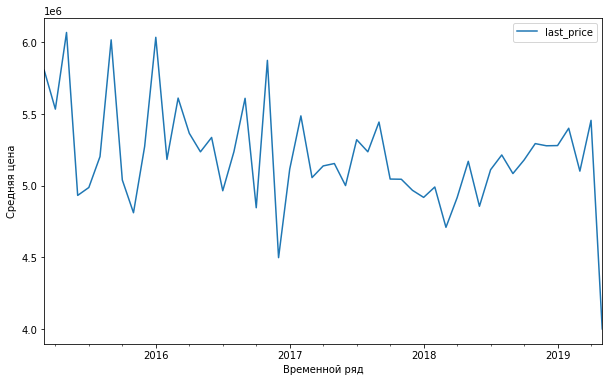

In [45]:
ax = data.pivot_table('last_price', index=['month_correct']).plot(
    figsize=(10,6))
ax.set_xlabel('Временной ряд')
ax.set_ylabel('Средняя цена')

<div class="alert alert-block alert-info">
По данному графику видно, что спад цены произошел в начале 2018 года. Пики наблюдаем в 2016 году(начало, середина и конец), а также в конце 2017 года
</div>

<AxesSubplot:xlabel='weekday'>

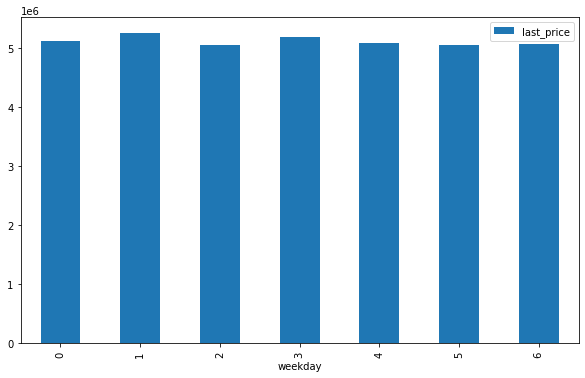

In [46]:
data.pivot_table('last_price', index='weekday').plot(
    kind='bar',
    figsize=(10, 6))

<div class="alert alert-block alert-info">
Чтобы оценить фактор влияния дня недели, построили столбчатую диаграмму. Видно, что средняя цена не особо зависит от этого фактора.
<div>

<AxesSubplot:xlabel='name_floor'>

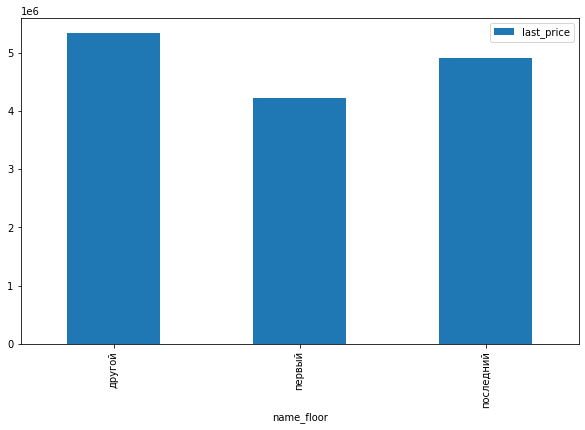

In [47]:
data.pivot_table('last_price', index='name_floor').plot(kind='bar',
                                                        figsize=(10, 6)
                                                       )

<div class="alert alert-block alert-info">
Видно, что наиболее высокая средняя цена для категории этажа "другой".
<\div>

In [48]:
#Отберём города с наибольшим количеством объявлений
top_cities = data['locality_name'].value_counts().sort_values(ascending=False).index.values[:10]

In [49]:
#посчитаем для этих городов среднюю стоимость жилья и отсортируем в порядке убывания
data[data['locality_name'].isin(top_cities)].groupby('locality_name')['meter_price'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург      106273.882341
Пушкин                98478.524214
деревня Кудрово       90826.341128
посёлок Парголово     89570.355642
посёлок Мурино        87851.175656
Петергоф              83267.248069
посёлок Шушары        78624.585485
Колпино               74827.939740
Гатчина               69935.545927
Всеволожск            66059.181357
Name: meter_price, dtype: float64

<div class="alert alert-block alert-info">
Из городов с наибольшим количеством объявлений смая большая стоимость за метр квадратный в Санкт-Петербурге, самая низкая- во Всеволожске
</div>

In [50]:
#Отбираем объеты в Санкт-Петербурге
data_peter = data[data['locality_name'] == 'Санкт-Петербург'].reset_index(drop=True)

In [51]:
data_peter['cityCenters_nearest_km'] = (data_peter['cityCenters_nearest'] / 1000).astype('int')
data_peter.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,month,year,month_correct,name_floor,ratio_living_area,ratio_kitchen_area,last_price_thousands,area_category,cityCenters_nearest_km
0,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,6,2018,2018-06-01,другой,0.320000,0.410000,10000.0,Средняя площадь,8
1,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,6,2,2017,2017-02-01,другой,0.714754,0.106557,5400.0,Средняя площадь,15
2,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,3,11,2017,2017-11-01,другой,0.512626,0.214646,5050.0,Маленькая площадь,13
3,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,3,11,2017,2017-11-01,первый,0.678049,0.109756,6700.0,Средняя площадь,10
4,8,3250000,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,4,1,2017,2017-01-01,другой,0.625806,0.180645,3250.0,Маленькая площадь,10


In [52]:
data_center = data_peter.pivot_table('last_price_thousands', index='cityCenters_nearest_km').reset_index()

<AxesSubplot:title={'center':'Зависимость цены от отдаленности от центра'}, xlabel='cityCenters_nearest_km', ylabel='last_price_thousands'>

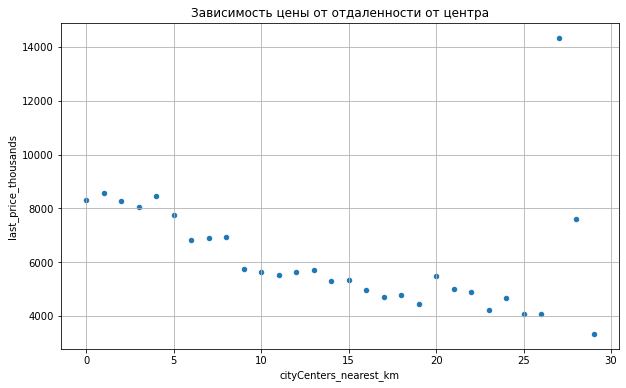

In [53]:
data_center.plot(
    x='cityCenters_nearest_km', 
    y='last_price_thousands', 
    figsize=(10,6), 
    title='Зависимость цены от отдаленности от центра',
    kind='scatter',
    grid=True
)

<AxesSubplot:xlabel='cityCenters_nearest_km'>

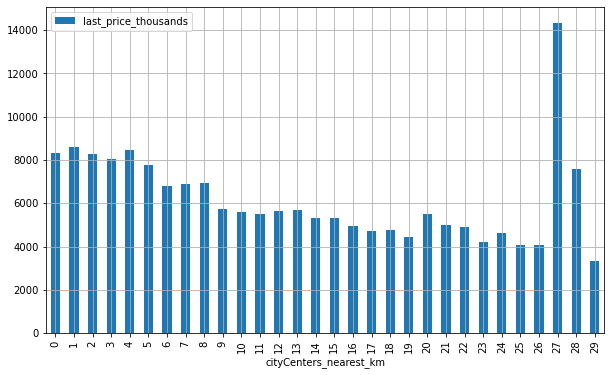

In [54]:
data_center.plot(
    x='cityCenters_nearest_km', 
    y='last_price_thousands', 
    kind='bar', 
    grid=True, 
    figsize=(10,6)
)


<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price_thousands'>

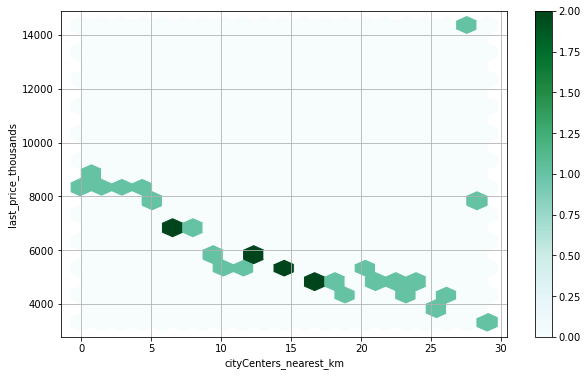

In [55]:
data_center.plot(x='cityCenters_nearest_km', y='last_price_thousands', kind='hexbin', sharex=False, grid=True, gridsize=20, figsize=(10, 6))

In [56]:
data_center = data_center.reset_index()

<div class="alert alert-block alert-info">
В целом, стоимость объектов снижается в зависимости от отдаления от центра. Сильно график меняется в точке 27 км. Значит в этой точке заканчивается центр
    
Но сказать, что это переломная часть графика-невозможно.    
</div>

In [57]:
#Выделим объекты центра
data_peter = data_peter.query('cityCenters_nearest_km < 7')

In [58]:
#Изучим данные
for column in columns_for_analysis:
    print(column)
    print(data_peter[column].describe())

total_area
count    1104.000000
mean       69.943216
std        25.119124
min        12.000000
25%        50.000000
50%        68.000000
75%        85.600000
max       148.600000
Name: total_area, dtype: float64
last_price_thousands
count     1104.000000
mean      7965.212663
std       2727.123888
min       1600.000000
25%       5950.000000
50%       7500.000000
75%       9649.250000
max      14990.000000
Name: last_price_thousands, dtype: float64
rooms
count    1104.000000
mean        2.452899
std         1.021771
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64
ceiling_height
count    1104.000000
mean        3.017382
std         0.313533
min         2.400000
25%         2.800000
50%         3.000000
75%         3.200000
max         3.980000
Name: ceiling_height, dtype: float64


<div class="alert alert-block alert-info">
<b>Площадь</b>
В столбце площади видим, что стандартное отклонение отличается  от среднего. Но, если посмотреть на минимальное и максимальное значения, то можно предположить, что эти данные реальны.
    
<b>Цена</b>
Медиана примерно равна среднему. Данные вполне реальны.
    
<b>Число комнат</b>
Минимум-1, максимум-5. Реально.
    
<b>Площадь</b>
Медиана примерно равно среднему. Стандартное отклонение невысококе.

</div>

total_area
AxesSubplot(0.125,0.125;0.775x0.755)
last_price_thousands
AxesSubplot(0.125,0.125;0.775x0.755)
rooms
AxesSubplot(0.125,0.125;0.775x0.755)
ceiling_height
AxesSubplot(0.125,0.125;0.775x0.755)


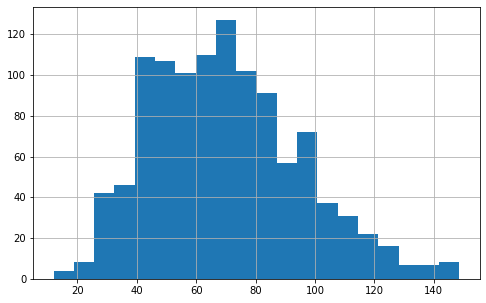

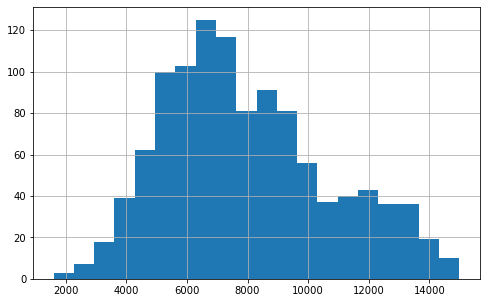

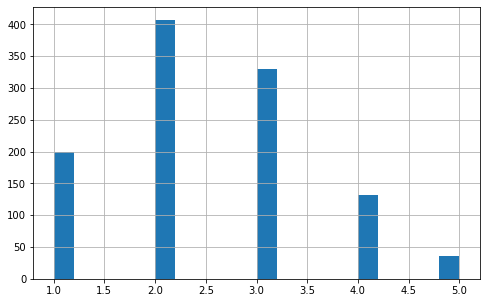

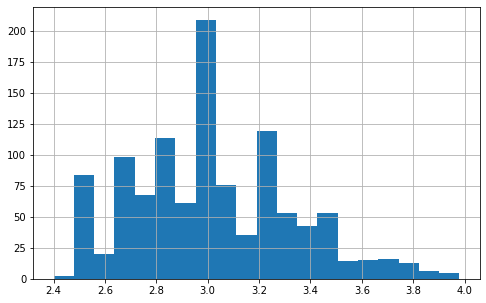

<Figure size 432x288 with 0 Axes>

In [59]:
for column in columns_for_analysis:
    print(column)
    print(data_peter[column].hist(bins=20, range=(data_peter[column].min(), data_peter[column].max()), figsize=(8,5)))
    plt.figure()

<div class="alert alert-block alert-info">
По первой гостограмме можно сделать вывод, что наиболее частая площадь около 70 кв. метров
По второй-самая распространенная цена 6500000 рублей за объект.
В Санкт-Петребурге в основном двухкомнатные квартиры.
А высота потолков около 3 метров в большинстве случаев.
</div>

In [60]:
cityCenters_nearest_peter = pd.cut(data_peter['cityCenters_nearest'], [0, 20000, 40000, 65000])

In [61]:
data_peter.pivot_table('last_price', index=['area_category', 'rooms', cityCenters_nearest_peter]).sort_values(by='last_price', ascending=False).head(10)

last_price
area_category   rooms cityCenters_nearest              
Большая площадь 1     (0, 20000]           1.280193e+07
                3     (0, 20000]           1.109313e+07
                4     (0, 20000]           1.100245e+07
                5     (0, 20000]           1.095126e+07
                2     (0, 20000]           1.049667e+07
Средняя площадь 5     (0, 20000]           9.362000e+06
                4     (0, 20000]           8.813179e+06
                1     (0, 20000]           8.578894e+06
                3     (0, 20000]           8.492384e+06
                2     (0, 20000]           8.149729e+06

<div class="alert alert-block alert-info">
Из таблицы видно, что самая большая стоимость за метр квадратный у объектов с большой площадью, одной комнатой и удаленными от центра на 0 - 20 км.
</div>

In [62]:
data_peter.pivot_table('last_price', index='name_floor').sort_values(by='last_price', ascending=False)

,last_price
name_floor,
другой,8.243788e+06
последний,8.011177e+06
первый,6.468866e+06


<div class="alert alert-block alert-info">
Самая высокая стоимость объектов, расположенных не на первом и не на последнем этажах.
</div>

In [63]:
data_peter.pivot_table('last_price', index=['weekday', 'month', 'year']).sort_values(by='last_price', ascending=False).head(10)

,,,last_price
weekday,month,year,
4,8,2015,14240000.0
0,6,2017,14200000.0
2,4,2016,13500000.0
5,8,2017,13500000.0
0,4,2015,13400000.0
1,11,2016,13100000.0
2,1,2016,12900000.0
0,1,2016,12300000.0
1,1,2019,12200000.0


In [64]:
#Посчитаем корреляцию между ценой за квадратный метр-число комнат, этаж, удалённость от центра, дата размещения объявления
correlation = pd.DataFrame(data_peter[analyzed_columns].corr().loc['last_price'])
correlation['mod'] = abs(correlation['last_price'])
correlation.sort_values(by='mod', ascending=False)

,last_price,mod
last_price,1.000000,1.000000
total_area,0.708682,0.708682
rooms,0.466431,0.466431
cityCenters_nearest,-0.152967,0.152967
floor,0.131345,0.131345
year,-0.030470,0.030470
month,-0.026437,0.026437
weekday,-0.007062,0.007062


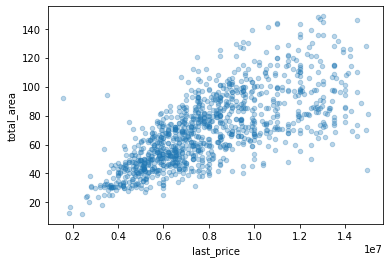

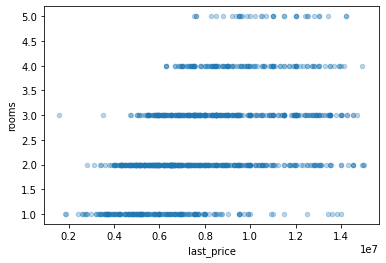

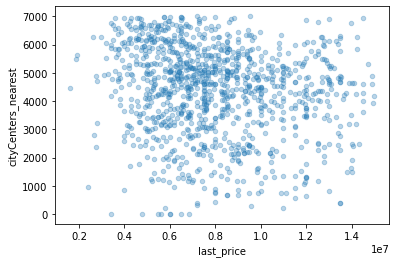

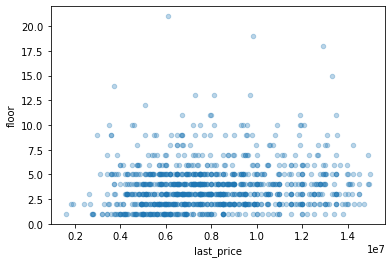

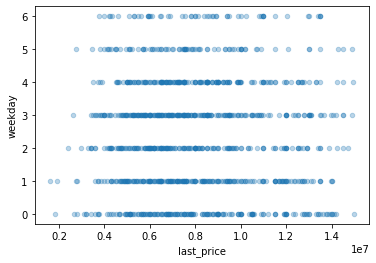

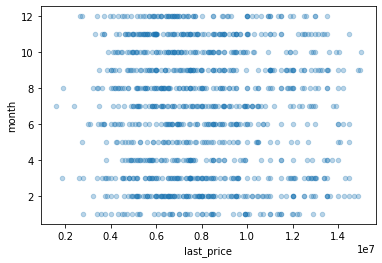

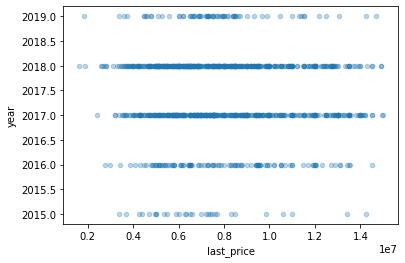

In [65]:
#Отобразим корреляцию на графиках
for feature in analyzed_columns[1:]:
    data_peter.plot(x='last_price', y=feature, kind='scatter', alpha=0.3)

<div class="alert alert-block alert-info">
Самая большая стоимость у объектов с  большой площадью, одной комнатой и близким расположением к центру (по всей базе - удаленными от центра на 40-65 км).

Самая высокая стоимость объектов, расположенных не на первом и не на последнем этажах, как и по всей базе.

Присутствует положительная линейная заивсимость между ценой и общей площадью.

    
</div>

In [66]:
data_peter[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.708682,0.466431,-0.152967
total_area,0.708682,1.000000,0.795329,-0.175502
rooms,0.466431,0.795329,1.000000,-0.145630
cityCenters_nearest,-0.152967,-0.175502,-0.145630,1.000000


<div class="alert alert-block alert-info">
Хорошо наблюдается положительная линейная зависимость у факторов цена и площадь.
</div>

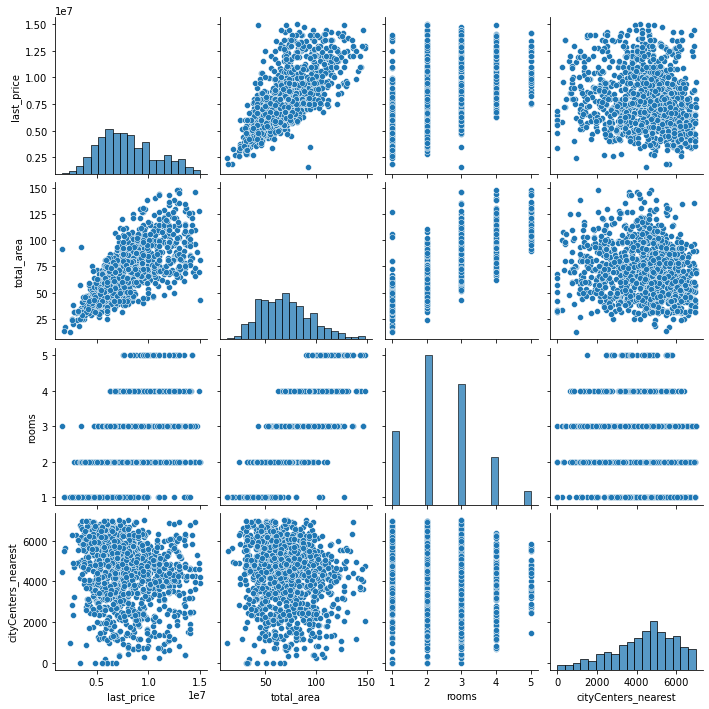

In [67]:
sns.pairplot(
    data_peter[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
)

<div class="alert alert-block alert-info">
Видим явную зависимость площади от цены.
</div>

Text(0, 0.5, 'Средняя цена')

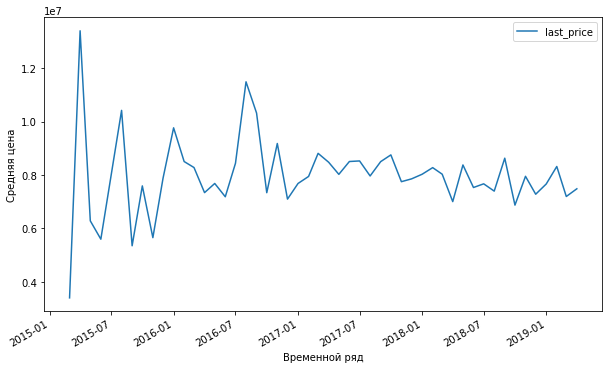

In [68]:
ax = data_peter.pivot_table('last_price', index=['month_correct']).plot(
    figsize=(10,6))
ax.set_xlabel('Временной ряд')
ax.set_ylabel('Средняя цена')

<AxesSubplot:xlabel='weekday'>

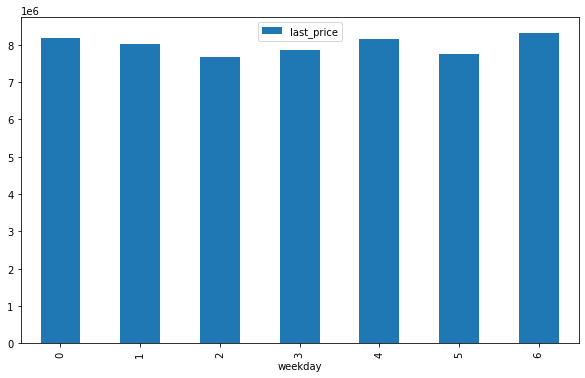

In [69]:
data_peter.pivot_table('last_price', index='weekday').plot(
    kind='bar',
    figsize=(10, 6))

<div class="alert alert-block alert-info">
Чтобы оценить фактор влияния дня недели, построили столбчатую диаграмму. Видно, что средняя цена не особо зависит от этого фактора.
</div>

<AxesSubplot:xlabel='name_floor'>

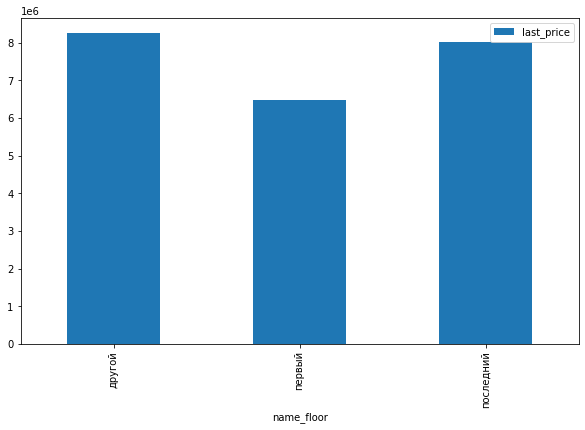

In [70]:
data_peter.pivot_table('last_price', index='name_floor').plot(kind='bar',
                                                        figsize=(10,6)
                                                       )

<div class="alert alert-block alert-info">
Видно, что наиболее высокая средняя цена для категории этажа "другой"
</div>

## Общий вывод

<div class="alert alert-block alert-info">
Таким образом, в данном проекте предобработали данные: обработали пропуски, привели некоторые признаки к определенному типу данных. Категоризировали неоторые признаки и выделили новые.
Дальше был произведен исследовательский анализ данных, отрезаны аномальные значения по некоторым признакам.
И выявлены следющие факты:
    

-Самая большая стоимость у объектов с большой площадью (50-100 кв. м), 3 комнатами и близкими от центра.

-Самая высокая стоимость объектов, расположенных не на первом и не на последнем этажах.

-Самая высокая стоимость объектов, объявления которых поданы в понедельник и вторник в сентябре 2015 года.
    
-Исходя из рассчитанной корреляции, присутствует положительная линейная зависимость у факторов цена и площадь
    
    
-Из городов с наибольшим количеством объявлений (10 городов) самая большая стоимость за метр квадратный в Санкт-Петербурге, самая низкая- во Всеволожске.
    
Был определен центр Санкт-Петербурга в зависимости от цены объектов недвижимости.
Далее были проанализированы объекты Санкт-Петербурга, выявлено следующее:
    
-Самая большая стоимость за метр квадратный у объектов с большой площадью, одной комнатой и близким расположением к центру.
    
-Самая высокая стоимость объектов, расположенных не на первом и не на последнем этажах, как и по всей базе.
    
-Исходя из рассчитанной корреляции, хорошо наблюдается положительная линейная зависимость у факторов цена и площадь.
 

</div>

<div class="alert alert-block alert-info">
Примерная рыночная стоимость для объектов по всей базе около 4-5 млн. рублей, исходя из влияния параметров.
Примерная рыночная стоимость для объектов центра Санкт-Петербурга около 7-8 млн. рублей.
Сильно влияет на цену такой параметр, как площадь в обоих случаях.
    
    
    
    
Не очень понятно, какой еще я могу сделать вывод из проведенного анализа, достигла ли я цели исследования...    